<a href="https://colab.research.google.com/github/acanavera/DecissionSupportSystemforRetailDiscount/blob/main/analytics_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving 2011_simplified.csv to 2011_simplified.csv
Saving 2012_simplified.csv to 2012_simplified.csv
Saving 2013_simplified.csv to 2013_simplified.csv
Saving 2014_simplified.csv to 2014_simplified.csv
Saving 2015_simplified.csv to 2015_simplified.csv
Saving 2016_simplified.csv to 2016_simplified.csv
Saving 2017_simplified.csv to 2017_simplified.csv


Problem 1. (30 pts) For each of the Deleted, Sent, and Total Columns, compute the mean and standard
deviation (std) by year, by all seven years, and by Description type. For Deleted, Sent and Total, there
are 8 means and stds each—1 for each year, and one for all 7 years combined. That’s 8x3=24. Another
15 come from Deleted, Sent, and Total for each of the 5 description types (summed over 7 years, not by
individual year). That’s 5x3=15. Total is 24+15=39. The main goal here is to get you to make different
paths through the data and get ideas for Problem 3.


In [ ]:
import pandas as pd

def create_dataframe_from_csv(filename):

    try:
        df = pd.read_csv(filename)
        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None




In [ ]:
import os
#Read All files from directory
List_files = []
for file in os.listdir():
    if file.endswith(".csv"):
        List_files.append(file)


In [ ]:
#define a function that reads files from list and creates a dataframe contactenating them
List_files

['2014_simplified.csv',
 '2012_simplified.csv',
 '2017_simplified.csv',
 '2011_simplified.csv',
 '2015_simplified.csv',
 '2016_simplified.csv',
 '2013_simplified.csv']

In [ ]:
# prompt: define a function that reads files from the list and creates a dataframe contactenating them and adding the year specified in the begining of the file name as a column

def concatenate_files_with_filename_var(file_list):

    dfs = []  # List to hold dataframes

    for file in file_list:
        # Read each file into a dataframe
        df = pd.read_csv(file)

        # Extract the first four characters from the filename
        prefix = file.split('/')[-1][:4]  # Assuming file paths are in Unix format; use '\\' for Windows paths

        # Add a new column to the dataframe with the prefix
        df['Year'] = prefix

        # Add the dataframe to the list
        dfs.append(df)

    # Concatenate all dataframes in the list into a single dataframe
    concatenated_df = pd.concat(dfs, ignore_index=True)

    return concatenated_df

# Example usage

email_data = concatenate_files_with_filename_var(List_files)
print(email_data)



     Week  Deleted  Sent  Total Description  Year
0       1      919   421   1340      Normal  2014
1       2      953   512   1465      Normal  2014
2       3      892   421   1313      Travel  2014
3       4      961   515   1476      Normal  2014
4       5      989   593   1582      Normal  2014
..    ...      ...   ...    ...         ...   ...
356    48      688   361   1049     Holiday  2013
357    49      995   531   1526      Normal  2013
358    50     1070   538   1608      Normal  2013
359    51      873   409   1282     Holiday  2013
360    52      265    18    283     Holiday  2013

[361 rows x 6 columns]


In [ ]:
# For each of the Deleted, Sent, and Total Columns, compute the mean and standard deviation (std) by year
email_data.groupby(['Year'])[['Deleted', 'Sent', 'Total']].agg(['mean', 'std'])


Deleted                    Sent                    Total            
            mean         std        mean         std         mean         std
Year                                                                         
2011  645.142857  126.828132  319.448980  118.335339   964.591837  238.622603
2012  629.942308  106.977808  314.307692   88.007695   944.250000  187.946997
2013  746.269231  159.647665  366.346154  131.471891  1112.615385  285.338887
2014  848.884615  146.999087  395.192308  130.679977  1244.076923  271.775848
2015  861.230769  167.822340  412.365385  149.124376  1273.596154  308.261619
2016  788.403846  118.389729  363.884615  110.111646  1152.288462  221.771507
2017  772.750000  129.562442  282.846154  105.391034  1055.596154  223.354748

In [ ]:
# For each of the Deleted, Sent, and Total Columns, compute the mean and standard deviation (std) by all seven years
email_data[['Deleted', 'Sent', 'Total']].agg(['mean', 'std'])

,Deleted,Sent,Total
mean,757.011080,350.886427,1107.897507
std,160.655359,127.117316,275.830197


In [ ]:
# For each of the Deleted, Sent, and Total Columns, compute the mean and standard deviation (std) by all seven years
email_data.groupby(['Description'])[['Deleted', 'Sent', 'Total']].agg(['mean', 'std'])

Deleted                    Sent                    Total  \
                    mean         std        mean         std         mean   
Description                                                                 
Announcement  815.800000  143.752217  437.400000  162.300031  1253.200000   
Holiday       460.434783  194.834388  157.086957  128.832489   617.521739   
Normal        811.543103  121.872611  407.017241   89.065517  1218.560345   
Travel        728.060976  120.562811  290.682927   85.914956  1018.743902   
Vacation      559.631579  112.130485  137.157895   81.300720   696.789474   

                          
                     std  
Description               
Announcement  297.622580  
Holiday       318.454202  
Normal        198.811263  
Travel        187.220396  
Vacation      165.687651

Problem 2. (30 pts) For the five description types, compute the 10 t-tests comparing them to each other
(e.g. Announcement to Normal, Travel to Normal, Holiday to Normal, etc.) for each of the Deleted, Sent,
and Total Columns. This should be for all (361) weeks—30 t-tests total—do not perform these on a peryear basis, please

In [ ]:
#T-test for deleted
#Since we are comparing with each other we are not seeing if one is bigger that the other I use the scipy.stats funciton ttest_ind.

import pandas as pd
from scipy.stats import ttest_ind
from itertools import combinations



# Extract the unique descriptions
descriptions = email_data ['Description'].unique()

# Perform t-tests
results = {}
for desc1, desc2 in combinations(descriptions, 2):
    group1 = email_data[email_data['Description'] == desc1]['Deleted']
    group2 = email_data[email_data['Description'] == desc2]['Deleted']

    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances

    results[(desc1, desc2)] = (t_stat, p_val)

# Print the results
for pair, (t_stat, p_val) in results.items():
    print(f"T-test between {pair[0]} and {pair[1]}:")
    print(f"T-statistic: {t_stat}, P-value: {p_val}\n")



T-test between Normal and Travel:
T-statistic: 5.374411652117484, P-value: 3.035965985045775e-07

T-test between Normal and Vacation:
T-statistic: 9.350788215584172, P-value: 4.708673819211528e-09

T-test between Normal and Announcement:
T-statistic: -0.06570911469392145, P-value: 0.9506714809708139

T-test between Normal and Holiday:
T-statistic: 8.479603160191376, P-value: 1.211287840306152e-08

T-test between Travel and Vacation:
T-statistic: 5.814791662973066, P-value: 2.83233907216468e-06

T-test between Travel and Announcement:
T-statistic: -1.3364233218779993, P-value: 0.24703681984499112

T-test between Travel and Holiday:
T-statistic: 6.26000111538864, P-value: 1.0879529982188544e-06

T-test between Vacation and Announcement:
T-statistic: -3.699519623356705, P-value: 0.01239164029269291

T-test between Vacation and Holiday:
T-statistic: 2.0629305497037915, P-value: 0.046371199628251786

T-test between Announcement and Holiday:
T-statistic: 4.672868210629989, P-value: 0.0018237

In [ ]:
#T-test for sent

import pandas as pd
from scipy.stats import ttest_ind
from itertools import combinations



# Extract the unique descriptions
descriptions = email_data ['Description'].unique()

# Perform t-tests
results = {}
for desc1, desc2 in combinations(descriptions, 2):
    group1 = email_data[email_data['Description'] == desc1]['Sent']
    group2 = email_data[email_data['Description'] == desc2]['Sent']

    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances

    results[(desc1, desc2)] = (t_stat, p_val)

# Print the results
for pair, (t_stat, p_val) in results.items():
    print(f"T-test between {pair[0]} and {pair[1]}:")
    print(f"T-statistic: {t_stat}, P-value: {p_val}\n")


T-test between Normal and Travel:
T-statistic: 10.438321892189762, P-value: 2.0061722488491176e-19

T-test between Normal and Vacation:
T-statistic: 13.80581202832125, P-value: 3.195217345269889e-12

T-test between Normal and Announcement:
T-statistic: -0.41724275933917854, P-value: 0.6976607174824301

T-test between Normal and Holiday:
T-statistic: 9.090859956018264, P-value: 2.913038171777121e-09

T-test between Travel and Vacation:
T-statistic: 7.33653556612921, P-value: 5.3495850976084243e-08

T-test between Travel and Announcement:
T-statistic: -2.0043247131261626, P-value: 0.11319600037829025

T-test between Travel and Holiday:
T-statistic: 4.689279140102508, P-value: 6.630690304528101e-05

T-test between Vacation and Announcement:
T-statistic: -4.006382930473827, P-value: 0.012459461959576458

T-test between Vacation and Holiday:
T-statistic: -0.6093834730825833, P-value: 0.54593189042023

T-test between Announcement and Holiday:
T-statistic: 3.6218743395680675, P-value: 0.01441

In [ ]:
#T-test for Total

import pandas as pd
from scipy.stats import ttest_ind
from itertools import combinations



# Extract the unique descriptions
descriptions = email_data ['Description'].unique()

# Perform t-tests
results = {}
for desc1, desc2 in combinations(descriptions, 2):
    group1 = email_data[email_data['Description'] == desc1]['Total']
    group2 = email_data[email_data['Description'] == desc2]['Total']

    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)  # Assuming unequal variances

    results[(desc1, desc2)] = (t_stat, p_val)

# Print the results
for pair, (t_stat, p_val) in results.items():
    print(f"T-test between {pair[0]} and {pair[1]}:")
    print(f"T-statistic: {t_stat}, P-value: {p_val}\n")

T-test between Normal and Travel:
T-statistic: 8.172281624073, P-value: 1.1643861669127303e-13

T-test between Normal and Vacation:
T-statistic: 12.982615367718655, P-value: 6.357566199312852e-12

T-test between Normal and Announcement:
T-statistic: -0.25900872454621066, P-value: 0.8081808221157912

T-test between Normal and Holiday:
T-statistic: 8.881512927749299, P-value: 5.212203963478993e-09

T-test between Travel and Vacation:
T-statistic: 7.440538313329196, P-value: 2.9284911734098096e-08

T-test between Travel and Announcement:
T-statistic: -1.7406178250936144, P-value: 0.15338153601413593

T-test between Travel and Holiday:
T-statistic: 5.769117464961998, P-value: 4.227490835347773e-06

T-test between Vacation and Announcement:
T-statistic: -4.01966275225356, P-value: 0.011621116082543539

T-test between Vacation and Holiday:
T-statistic: 1.0360133787787031, P-value: 0.3074489342254397

T-test between Announcement and Holiday:
T-statistic: 4.273608122784708, P-value: 0.00491987

Problem 2: Tests Results

Problem 3. (30 pts) Compute at least two conditional probabilities, along lines of:
1. If the previous week was above 1500 Total, this week will be above/below the overall mean
2. If the previous week was an Announcement, this week will be above/below the overall mean
3. The probability of the Total being above 1500 given it is a Normal week = p(1500|N). The
probability of a Normal week = p(N). The probability of a 1500 Total is p(1500). Compute
p(N|1500) using the Bayesian equation and compare to the actual results

If the previous week was above 1500 Total, this week will be above/below the overall mean
Steps mark with 1 all rows where Total was > 1500
calculate mean all total
add another column with 1 above 0 below
sum all above/perivous week total

In [ ]:
# create a python command that adds a column to the dataframe email_data with the condition that the previous row value for Total is above 1500
email_data_percentage=email_data.copy().sort_values(by=['Year','Week'])
email_data_percentage['Prev_Total_Above_1500'] = email_data_percentage['Total'].shift(1) > 1500
email_data_percentage['Prev_Total_Above_1500'] = email_data_percentage['Prev_Total_Above_1500'].astype(int)
# previous week was an Announcement
email_data_percentage['Prev_Announcement'] = email_data_percentage['Description'].shift(1) == 'Announcement'
email_data_percentage['Prev_Announcement'] = email_data_percentage['Prev_Announcement'].astype(int)

In [ ]:
#calculate mean all total
email_data_percentage['Total_Mean']=email_data_percentage['Total'].mean()
email_data_percentage['Total_Mean']=email_data_percentage['Total_Mean'].astype(int)
#add another column with 1 above 0 below
email_data_percentage['above_Mean']=email_data_percentage['Total']>email_data_percentage['Total_Mean']
email_data_percentage['above_Mean']=email_data_percentage['above_Mean'].astype(int)



In [ ]:
#If the previous week was above 1500 Total, this week will be above/below the overall mean
abovemean_prev_1500=email_data_percentage[email_data_percentage['Prev_Total_Above_1500']==1]['above_Mean'].sum()
prev_1500_total=email_data_percentage[email_data_percentage['Prev_Total_Above_1500']==1].shape[0]
perc_prob_above_mean_if_pre_1500=abovemean_prev_1500/prev_1500_total
perc_prob_above_mean_if_pre_1500

0.8260869565217391

In [ ]:
#If the previous week was an Announcement, this week will be above/below the overall mean
abovemean_prev_annoncement=email_data_percentage[email_data_percentage['Prev_Announcement']==1]['above_Mean'].sum()
prev_announcement_total=email_data_percentage[email_data_percentage['Prev_Announcement']==1].shape[0]
perc_prob_above_mean_if_pre_announcement=abovemean_prev_annoncement/prev_announcement_total
perc_prob_above_mean_if_pre_announcement

0.8

In [ ]:
#The probability of the Total being above 1500 given it is a Normal week = p(1500|N).
beyond_1500_N=email_data_percentage[(email_data_percentage['Description']=="Normal")&(email_data_percentage['Total']>1500)].shape[0] #all beyond 1500 in normal weeks
Normal_weeks=email_data_percentage[email_data_percentage['Description']=="Normal"].shape[0]
#p(1500|N)
P1500_N=beyond_1500_N/Normal_weeks
#The probability of a Normal week = p(N).
P_N=email_data_percentage[email_data_percentage['Description']=="Normal"].shape[0]/email_data_percentage.shape[0]
#The probability of a 1500 Total is p(1500).
P_1500=email_data_percentage[email_data_percentage['Prev_Total_Above_1500']==1].shape[0]/email_data_percentage.shape[0]
#Compute p(N|1500) using the Bayesian equation and compare to the actual results
#P(A|B)=P(B|A)*P(A)/P(B)
#P(A)=P(1500)
#P(B)=P(N)
#P(B|A)=P(N|1500)
#P(B|A)=P(A|B)*P(B)/P(A)
#P(N|1500)=P(1500|N)*P(N)/P(1500)
P_N_1500=P1500_N*P_N/P_1500
print(P_N_1500)

0.9565217391304347


In [ ]:
#lets verify
total_1500=email_data_percentage[email_data_percentage['Prev_Total_Above_1500']==1].shape[0]
beyond_1500_N=email_data_percentage[(email_data_percentage['Description']=="Normal")&(email_data_percentage['Total']>1500)].shape[0] #all beyond 1500 in normal weeks
print(total_1500)
print(beyond_1500_N)
P_N_1500=beyond_1500_N/total_1500
print(P_N_1500)

23
22
0.9565217391304348


Problem 4. (10 pts) The show-your-creative-side problem! Well, if I tell you how to be creative, it sort of
defeats the purpose, right? But, to be fair, here are a couple of example of what types of creativity I see
being worth your time:
Name
1. Produce a plainspoken artifact, such as “The Travel weeks have much larger coefficient of
variance (ratio of std/mean) than the Vacation weeks”
2. Divide the year into quarters and spark an insight.
3. Perform a histogram analysis of weeks 1-52 and perform a regression (hint, linear not the best).
4. Find out if the trend before the HP Split in October 2015 show a different trend than after the
split (Hint: they do).


In [53]:
#First let's add one columnt to the dataframe with the date week starts
import pandas as pd

# Create a new column for the date of the beginning of the week
email_data['Date'] = pd.to_datetime(email_data['Year'].astype(str) + '-W' + email_data['Week'].astype(str) + '-1', format='%Y-W%U-%w')


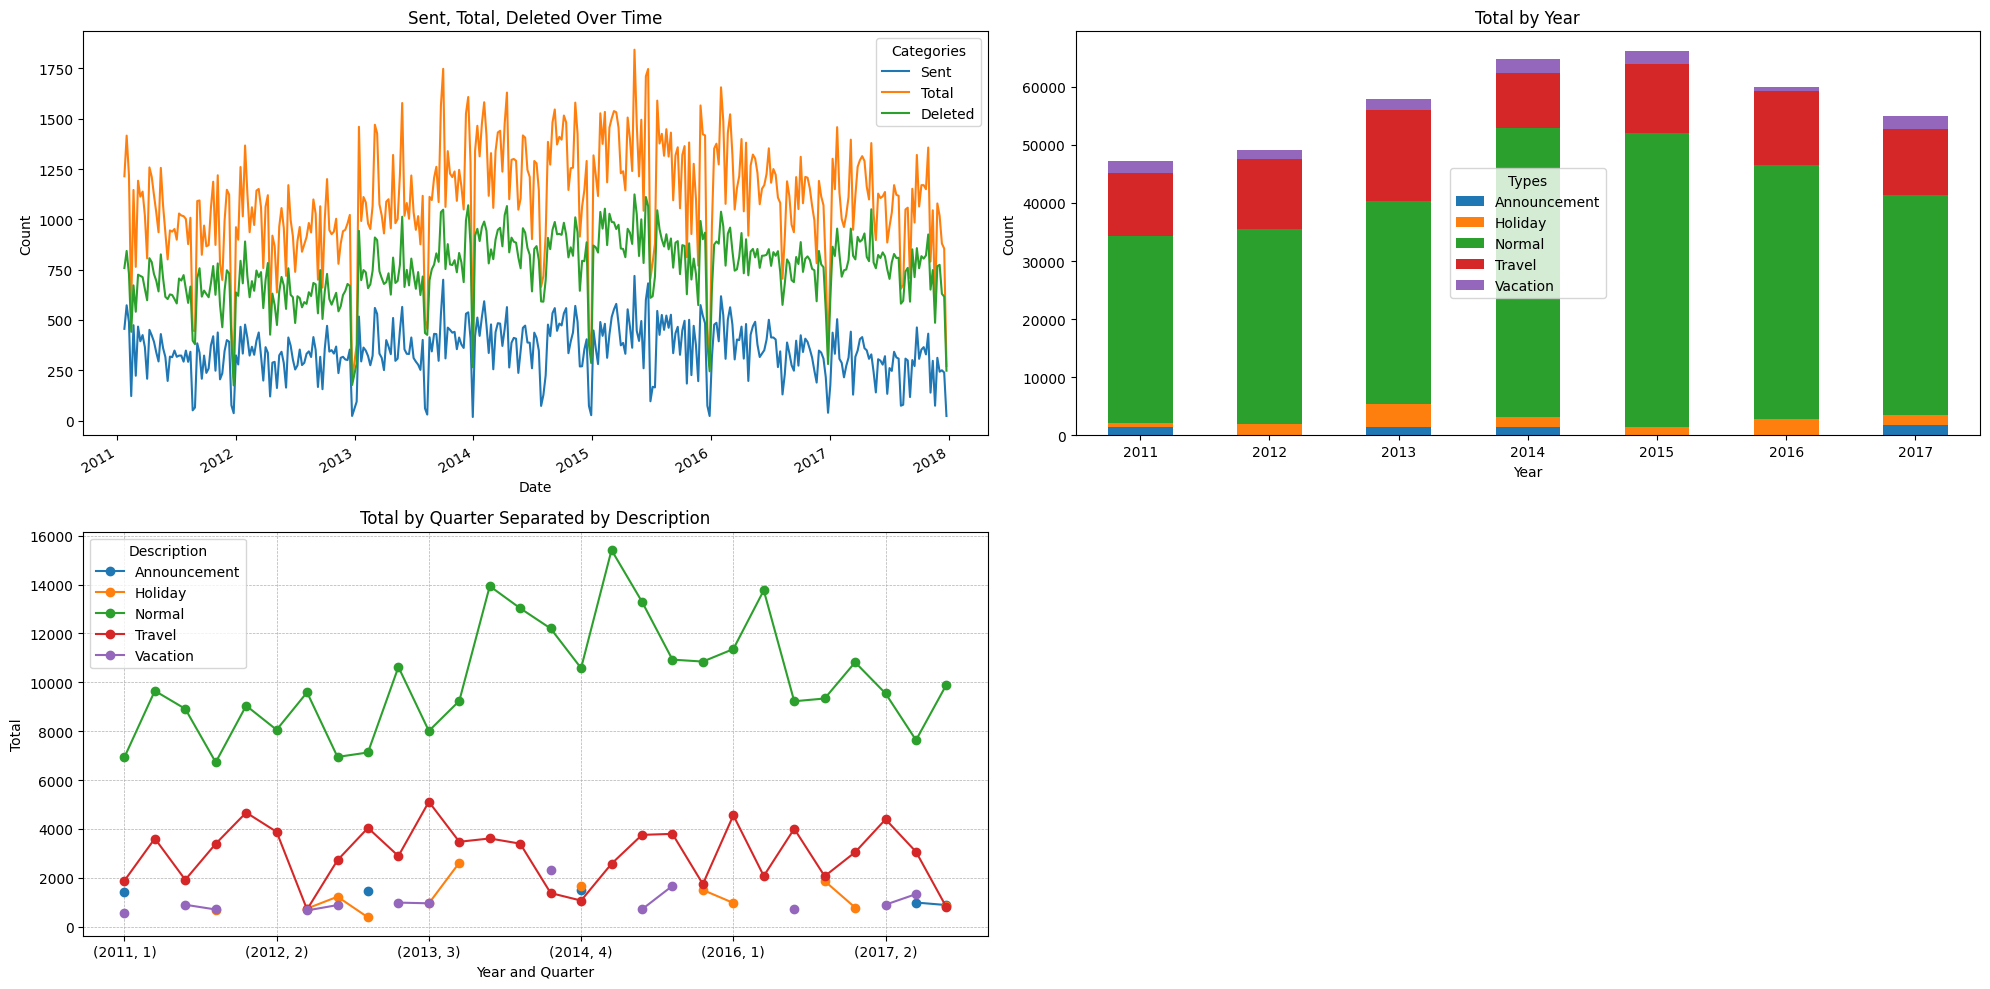

In [71]:
import matplotlib.pyplot as plt

# Create a grid of plots: 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Chart 1: Totals by year
email_data.set_index('Date')[['Sent', 'Total', 'Deleted']].plot(ax=axes[0, 0], kind='line')
axes[0, 0].set_title('Sent, Total, Deleted Over Time')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xlabel('Date')
axes[0, 0].legend(title='Categories')

email_data['Quarter'] = email_data['Date'].dt.quarter

# Chart 2: Total by Year
grouped = email_data.groupby(['Year', 'Description'])['Total'].sum().unstack()
grouped.plot(ax=axes[0, 1], kind='bar', stacked=True)
axes[0, 1].set_title('Total by Year')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xlabel('Year')
axes[0, 1].legend(title='Types')
axes[0, 1].tick_params(axis='x', rotation=0)  # Rotate x-axis labels for better clarity

# Chart 3: Total by Quarter Separated by Description
grouped = email_data.groupby(['Year', 'Quarter', 'Description'])['Total'].sum().reset_index()
pivot_data = grouped.pivot_table(index=['Year', 'Quarter'], columns='Description', values='Total')
pivot_data.plot(ax=axes[1, 0], kind='line', marker='o')
axes[1, 0].set_title('Total by Quarter Separated by Description')
axes[1, 0].set_ylabel('Total')
axes[1, 0].set_xlabel('Year and Quarter')
axes[1, 0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1, 0].legend(title='Description')

# Remove the unused plot space
axes[1, 1].remove()

# Adjust layout to ensure plots do not overlap
plt.tight_layout()
plt.show()


Insights In general I will demonstrate that the trend in Normal emails Total is different before and after october 2015.
I will add new columns that show yoy weekly trend. and I will do a t-test between yoy trends before oct 15 and after

In [80]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

email_data = email_data.sort_values(by=['Year', 'Week']).reset_index(drop=True)

# Number of unique weeks in the DataFrame
num_weeks = email_data['Week'].nunique()

# Shift the 'Total' column by num_weeks to get the 'Total' of the same week from the previous year
email_data['Prev_Year_Total'] = email_data['Total'].shift(periods=num_weeks)

# Calculate the percentage difference and create a new column
email_data['Percentage_Difference'] = ((email_data['Total'] - email_data['Prev_Year_Total']) / email_data['Prev_Year_Total']) * 100

# Drop the temporary 'Prev_Year_Total' column
email_data.drop('Prev_Year_Total', axis=1, inplace=True)

# Create teh cutt off date and mark the data as before and after
cutoff_date = pd.Timestamp('2015-10-01')
email_data['Period'] = np.where(email_data['Date'] < cutoff_date, 'before', 'after')
# Splitting the data into 'before' and 'after' groups
before_data = email_data[email_data['Period'] == 'before']['Percentage_Difference'].dropna()
after_data = email_data[email_data['Period'] == 'after']['Percentage_Difference'].dropna()

# Perform the t-test
t_stat, p_value = ttest_ind(before_data, after_data)

print(f"t_statistic: {t_stat}")
print(f"P_value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the two periods.")
    # Interpretation of direction of difference
    if after_data.mean() > before_data.mean():
        print("The difference is positive, indicating an increase in the Percentage_Difference after October 2015.")
    else:
        print("The difference is negative, indicating a decrease in the Percentage_Difference after October 2015.")
else:
    print("There is no statistically significant difference between the two periods.")


t_statistic: 5.0243257333773395
P_value: 8.591905864539846e-07
There is a statistically significant difference between the two periods.
The difference is negative, indicating a decrease in the Percentage_Difference after October 2015.


In [86]:
email_data=email_data.drop(columns=['Percentage_Difference'])

Now I will demonstrate that this difference is only for Normal email not for travel

In [87]:
#Normal
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

email_data_normal = email_data[email_data['Description']=='Normal']


email_data_normal = email_data_normal.sort_values(by=['Year', 'Week']).reset_index(drop=True)

# Number of unique weeks in the DataFrame
num_weeks = email_data_normal['Week'].nunique()

# Shift the 'Total' column by num_weeks to get the 'Total' of the same week from the previous year
email_data_normal['Prev_Year_Total'] = email_data_normal['Total'].shift(periods=num_weeks)

# Calculate the percentage difference and create a new column
email_data_normal['Percentage_Difference'] = ((email_data_normal['Total'] - email_data_normal['Prev_Year_Total']) / email_data_normal['Prev_Year_Total']) * 100

# Drop the temporary 'Prev_Year_Total' column
email_data_normal.drop('Prev_Year_Total', axis=1, inplace=True)

# Create the cut-off date and mark the data as before and after
cutoff_date = pd.Timestamp('2015-10-01')
email_data_normal['Period'] = np.where(email_data_normal['Date'] < cutoff_date, 'before', 'after')

# Splitting the data into 'before' and 'after' groups
before_data = email_data_normal[email_data_normal['Period'] == 'before']['Percentage_Difference'].dropna()
after_data = email_data_normal[email_data_normal['Period'] == 'after']['Percentage_Difference'].dropna()

# Perform the t-test
t_stat, p_value = ttest_ind(before_data, after_data)

print(f"t_statistic: {t_stat}")
print(f"P_value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the two periods.")
    # Interpretation of direction of difference
    if after_data.mean() > before_data.mean():
        print("The difference is positive, indicating an increase in the Percentage_Difference after October 2015.")
    else:
        print("The difference is negative, indicating a decrease in the Percentage_Difference after October 2015.")
else:
    print("There is no statistically significant difference between the two periods.")





t_statistic: 7.50935520243903
P_value: 2.663412151375634e-12
There is a statistically significant difference between the two periods.
The difference is negative, indicating a decrease in the Percentage_Difference after October 2015.


In [88]:
# Select only travel data
email_data_travel=email_data[email_data['Description']=='Travel']

#Sort values
email_data_travel = email_data_travel.sort_values(by=['Year', 'Week']).reset_index(drop=True)

# Number of unique weeks in the DataFrame
num_weeks = email_data_travel['Week'].nunique()

# Shift the 'Total' column by num_weeks to get the 'Total' of the same week from the previous year
email_data_travel['Prev_Year_Total'] = email_data_travel['Total'].shift(periods=num_weeks)

# Calculate the percentage difference and create a new column
email_data_travel['Percentage_Difference'] = ((email_data_travel['Total'] - email_data_travel['Prev_Year_Total']) / email_data_travel['Prev_Year_Total']) * 100

# Drop the temporary 'Prev_Year_Total' column
email_data_travel.drop('Prev_Year_Total', axis=1, inplace=True)

# Create the cut-off date and mark the data as before and after
cutoff_date = pd.Timestamp('2015-10-01')
email_data_travel['Period'] = np.where(email_data_travel['Date'] < cutoff_date, 'before', 'after')

# Splitting the data into 'before' and 'after' groups
before_data = email_data_travel[email_data_travel['Period'] == 'before']['Percentage_Difference'].dropna()
after_data = email_data_travel[email_data_travel['Period'] == 'after']['Percentage_Difference'].dropna()

# Perform the t-test
t_stat, p_value = ttest_ind(before_data, after_data)

print(f"t_statistic: {t_stat}")
print(f"P_value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the two periods.")
    # Interpretation of direction of difference
    if after_data.mean() > before_data.mean():
        print("The difference is positive, indicating an increase in the Percentage_Difference after October 2015.")
    else:
        print("The difference is negative, indicating a decrease in the Percentage_Difference after October 2015.")
else:
    print("There is no statistically significant difference between the two periods.")


t_statistic: 2.676750149546445
P_value: 0.010725963871870912
There is a statistically significant difference between the two periods.
The difference is negative, indicating a decrease in the Percentage_Difference after October 2015.


So this is the summary:
t_statistic:

1.   Total All Description = 5.024
2.   Total Normal Description = 7.51
3.   Total Travel Description = 2.68

As we can see the t statistics is higher in Normal, revealing that the differences between the two periods are more acute in the Normal emails than in the Travel emails.








---



In [82]:
email_data[email_data['Description']=='Normal']

,Week,Deleted,Sent,Total,Description,Year,Date,Quarter,Percentage_Difference,Period
0,4,758,456,1214,Normal,2011,2011-01-24,1,NaN,before
2,6,730,490,1220,Normal,2011,2011-02-07,1,NaN,before
4,8,672,474,1146,Normal,2011,2011-02-21,1,NaN,before
6,10,725,467,1192,Normal,2011,2011-03-07,1,NaN,before
8,12,713,425,1138,Normal,2011,2011-03-21,1,NaN,before
...,...,...,...,...,...,...,...,...,...,...
352,44,925,432,1357,Normal,2017,2017-10-30,4,17.590988,after
354,46,748,297,1045,Normal,2017,2017-11-13,4,5.025126,after
356,48,767,312,1079,Normal,2017,2017-11-27,4,-9.403862,after
357,49,774,243,1017,Normal,2017,2017-12-04,4,-8.707361,after


Description: Normal
T-statistic: 0.11625958239691997
P-value: 0.9075482634306334
There is no statistically significant difference between the two periods.
----------
Description: Travel
T-statistic: -0.3177777184327126
P-value: 0.7514815363946459
There is no statistically significant difference between the two periods.
----------


In [76]:
email_data

,Week,Deleted,Sent,Total,Description,Year,Date,Quarter,Percentage_Difference,Period
0,4,758,456,1214,Normal,2011,2011-01-24,1,NaN,before
1,5,843,573,1416,Announcement,2011,2011-01-31,1,NaN,before
2,6,730,490,1220,Normal,2011,2011-02-07,1,NaN,before
3,7,441,122,563,Vacation,2011,2011-02-14,1,NaN,before
4,8,672,474,1146,Normal,2011,2011-02-21,1,NaN,before
...,...,...,...,...,...,...,...,...,...,...
356,48,767,312,1079,Normal,2017,2017-11-27,4,-9.403862,after
357,49,774,243,1017,Normal,2017,2017-12-04,4,-8.707361,after
358,50,630,250,880,Announcement,2017,2017-12-11,4,-17.757009,after
359,51,616,239,855,Normal,2017,2017-12-18,4,12.204724,after
